<a href="https://colab.research.google.com/github/OrionXV/AI7101-Project/blob/main/AI7101GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data


In [1]:
!rm -rf AI7101-Project
!git clone https://github.com/OrionXV/AI7101-Project.git

Cloning into 'AI7101-Project'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 81 (delta 37), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 7.23 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class CONFIG:
    SEED = 42
    BASE_DIR =  '/content/AI7101-Project/data'
    TRAIN_PATH = os.path.join(BASE_DIR, 'train.csv')
    TEST_PATH = os.path.join(BASE_DIR, 'test.csv')
    SUBMISSION_PATH = os.path.join(BASE_DIR, 'submission.csv')
    TRAIN_TARGETS_PATH = os.path.join(BASE_DIR, 'training_labels.csv')


In [4]:
train = pd.read_csv(CONFIG.TRAIN_PATH)
train_targets = pd.read_csv(CONFIG.TRAIN_TARGETS_PATH)
test = pd.read_csv(CONFIG.TEST_PATH)
submission = pd.read_csv(CONFIG.SUBMISSION_PATH)

In [5]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
train.shape

(59400, 40)

## Basic EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
# for col in train.columns:
#     if train[col].dtype == 'object':
#         print( f'{col} :', len(train[col].unique()))

unique_counts = {
    col: train[col].nunique()
    for col in train.columns
    if train[col].dtype == 'object'}

unique_counts_df = (pd.DataFrame.from_dict(unique_counts, orient='index', columns=['n_unique'])
                      .sort_values(by='n_unique', ascending=False))

unique_counts_df.head(10)#.plot(kind='bar')


,n_unique
wpt_name,37399
subvillage,19287
scheme_name,2695
installer,2145
ward,2092
funder,1896
date_recorded,356
lga,125
region,21
extraction_type,18


In [9]:
top_missing = train.isnull().sum().sort_values(ascending=False).head(9)


In [10]:
summary = []
for col, missing_count in top_missing.items():
    dtype = train[col].dtype
    if dtype == 'object':
        unique_vals = train[col].nunique()
    else:
        unique_vals = None
    summary.append({
        'column': col,
        'missing': missing_count,
        'dtype': dtype,
        'unique_values (if object)': unique_vals
    })

pd.DataFrame(summary)

,column,missing,dtype,unique_values (if object)
0,scheme_name,28810,object,2695.0
1,scheme_management,3878,object,11.0
2,installer,3655,object,2145.0
3,funder,3637,object,1896.0
4,public_meeting,3334,object,2.0
5,permit,3056,object,2.0
6,subvillage,371,object,19287.0
7,wpt_name,2,object,37399.0
8,latitude,0,float64,NaN


In [11]:
train_targets['status_group'].value_counts(normalize=True) * 100


,proportion
status_group,
functional,54.308081
non functional,38.424242
functional needs repair,7.267677


In [12]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


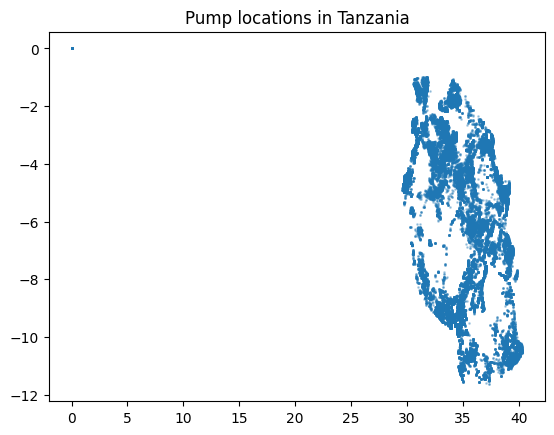

In [13]:
plt.scatter(train['longitude'], train['latitude'], s=1, alpha=0.3)
plt.title("Pump locations in Tanzania")
plt.show()


In [14]:
train['date_recorded'].head()
test['date_recorded'].head()

,date_recorded
0,2013-02-04
1,2013-02-04
2,2013-02-01
3,2013-01-22
4,2013-03-27


## Data Cleaning and Imputation

In [15]:
from sklearn.impute import KNNImputer

class PumpPreprocessor:
    def __init__(self, n_neighbors=5):
        self.freq_maps = {}
        self.train_columns = None
        self.drop_cols = ["wpt_name", "subvillage", "recorded_by", ]
        self.high_card_cols = ["scheme_name", "installer", "funder", "ward"]
        self.cat_impute_cols = ["scheme_management", "public_meeting", "permit"]
        self.datetime_cols = [] #['date_recorded']
        self.imputer = KNNImputer(n_neighbors=n_neighbors)

    def fit(self, df: pd.DataFrame):
        df_fit = df.drop(columns=self.drop_cols).copy()

        for col in self.high_card_cols:
            freq_map = df_fit[col].value_counts().to_dict()
            self.freq_maps[col] = freq_map

        for col in self.cat_impute_cols:
            df_fit[col] = df_fit[col].fillna("Unknown")

        for col, freq_map in self.freq_maps.items():
            df_fit[col] = df_fit[col].map(freq_map).fillna(0)

        df_fit = pd.get_dummies(df_fit, drop_first=False)

        num_cols = df_fit.select_dtypes(include=["float64", "int64"]).columns
        df_fit[num_cols] = self.imputer.fit_transform(df_fit[num_cols])

        self.train_columns = df_fit.columns
        return self

    def transform(self, df: pd.DataFrame, is_train=False):
        df_proc = df.drop(columns=self.drop_cols).copy()

        for col in self.cat_impute_cols:
            if col in df_proc.columns:
                df_proc[col] = df_proc[col].fillna("Unknown")

        for col, freq_map in self.freq_maps.items():
            if col in df_proc.columns:
                df_proc[col] = df_proc[col].map(freq_map).fillna(0)

        num_cols = df_proc.select_dtypes(include=["float64", "int64"]).columns
        df_proc[num_cols] = self.imputer.transform(df_proc[num_cols])

        df_proc = pd.get_dummies(df_proc, drop_first=False)

        for col in self.train_columns:
            if col not in df_proc.columns:
                df_proc[col] = 0
        df_proc = df_proc[self.train_columns]

        for col in self.datetime_cols:
            df_proc[col] = pd.to_datetime(df_proc[col]) #.apply(lambda x: x.strip().split('_')[1])
            df_proc[str(col) + '_year'] = df_proc[col].apply(lambda x: x.dt.year)
            df_proc[str(col) + '_month'] = df_proc[col].apply(lambda x: x.dt.month)
            df_proc[str(col) + '_day'] = df_proc[col].apply(lambda x: x.dt.day)

        return df_proc




In [16]:
preprocessor = PumpPreprocessor(n_neighbors=5).fit(train)


In [17]:
%%capture
train['date_recorded'] = pd.to_datetime(train['date_recorded'])
test['date_recorded'] = pd.to_datetime(test['date_recorded'])

for df in [train, test]:
    df["year_recorded"] = df["date_recorded"].dt.year
    df["month_recorded"] = df["date_recorded"].dt.month
    df["day_recorded"] = df["date_recorded"].dt.day

train = train.drop(columns=["date_recorded"])
test = test.drop(columns=["date_recorded"])

train_final = preprocessor.transform(train, is_train=True)
test_final = preprocessor.transform(test, is_train=False)



In [18]:
print("Train shape:", train_final.shape)
print("Test shape:", test_final.shape)

Train shape: (59400, 669)
Test shape: (14850, 669)


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

X_train, X_val, y_train, y_val = train_test_split(
    train_final, train_targets.drop('id', axis=1),
    test_size=0.2,
    random_state=42,
    stratify=train_targets.drop('id', axis=1)
)

In [21]:
lgb_estimator = lgb.LGBMClassifier(
    objective="multiclass",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 200, 500],
    "learning_rate": [0.01, 0.001, 0.0001],
    "max_depth": [-1],
    "reg_alpha": [0.1],   # L1 regularization
    "reg_lambda": [0.1]   # L2 regularization
}

grid_search = GridSearchCV(
    estimator=lgb_estimator,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,                # 3-fold CV
    verbose=2,
    n_jobs=-1
)

In [22]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47520 entries, 43360 to 49783
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  47520 non-null  object
dtypes: object(1)
memory usage: 742.5+ KB


In [ ]:
grid_search.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="multi_logloss",
)

best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=le.classes_))

In [ ]:
y_test_pred = best_model.predict(test_final)

submission["status_group"] = y_test_pred
submission.to_csv("submission.csv", index=False)

submission.head()
